In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import glob
import matplotlib.pyplot as plt
import polars as pl
import genomic_ranges as gr

%load_ext lab_black

# http://resources.idibaps.org/paper/the-reference-epigenome-and-regulatory-chromatin-landscape-of-chronic-lymphocytic-leukemia

In [2]:
sorted(glob.glob("chromhmm/*.bed"))

['chromhmm/CLL110_12_segments.bed',
 'chromhmm/CLL1228_12_segments.bed',
 'chromhmm/CLL12_12_segments.bed',
 'chromhmm/CLL1525_12_segments.bed',
 'chromhmm/CLL1532_12_segments.bed',
 'chromhmm/CLL182_12_segments.bed',
 'chromhmm/CLL3_12_segments.bed',
 'chromhmm/GCBC1_12_segments.bed',
 'chromhmm/GCBC2_12_segments.bed',
 'chromhmm/GCBC3_12_segments.bed',
 'chromhmm/NBCB1_12_segments.bed',
 'chromhmm/NBCB2_12_segments.bed',
 'chromhmm/NBCB3_12_segments.bed',
 'chromhmm/NBCB_set_scored_unique_filtered.bed',
 'chromhmm/NBCB_set_scored_unique_filtered_sorted.bed',
 'chromhmm/NBCT1_12_segments.bed',
 'chromhmm/NBCT2_12_segments.bed',
 'chromhmm/NBCT3_12_segments.bed',
 'chromhmm/PCT1_12_segments.bed',
 'chromhmm/PCT2_12_segments.bed',
 'chromhmm/PCT3_12_segments.bed',
 'chromhmm/csMBC1_12_segments.bed',
 'chromhmm/csMBC2_12_segments.bed',
 'chromhmm/merged_set_scored_unique_filtered.bed',
 'chromhmm/merged_set_scored_unique_filtered_sorted.bed',
 'chromhmm/ncsMBC_12_segments.bed']

Load the 6 b cell annotations

In [3]:
files = [
    "chromhmm/csMBC1_12_segments.bed",
    "chromhmm/csMBC2_12_segments.bed",
    "chromhmm/ncsMBC_12_segments.bed",
    "chromhmm/NBCB1_12_segments.bed",
    "chromhmm/NBCB2_12_segments.bed",
    "chromhmm/NBCB3_12_segments.bed",
]

  - Active Promoter = E1
  - Weak Promoter = E3
  - Poised Promoter = E4
  - Strong Enh = E2
  - Strong Enh2 = E6
  - Weak Enh = E5
  - Transcription Transition = E7
  - Transcription Elongation = E9
  - Weak Transcription = E8
  - Heterochrom,repressed = E10
  - Polycomb Repressed = E12
  - Heterochrom, low signal = E11

Created a merged dataframe based on outer join of the regions:

In [4]:
df_merged = pd.DataFrame()
for file in files:
    sample = file.split("/")[-1].split("_")[0]
    df = pd.read_csv(file, sep="\t", header=None)
    df.index = df[0] + ":" + df[1].astype(str) + "-" + df[2].astype(str)
    df.columns = ["chr", "begin", "end", sample]
    print(sample)
    print(df[sample].value_counts())
    print(df[sample].value_counts().sum())
    print("\n")

    if files.index(file) == 0:
        df_merged[sample] = df[sample]
    else:
        df_merged = df_merged.join(df[sample], how="outer")

# df_merged = df_merged.fillna("none")

csMBC1
E11    88515
E5     71950
E8     67986
E9     45949
E3     36650
E12    35221
E2     30404
E10    25062
E1     19094
E6     16629
E7     13072
E4      7096
Name: csMBC1, dtype: int64
457628


csMBC2
E11    93623
E8     68048
E5     61841
E9     50126
E12    46917
E3     33566
E10    25510
E1     11979
E7     11609
E4      7627
E2      7597
E6      3518
Name: csMBC2, dtype: int64
421961


ncsMBC
E11    83992
E5     73543
E8     69275
E9     50125
E12    45870
E3     38926
E7     13360
E10    12473
E1     11126
E2     10187
E4      8987
E6      2142
Name: ncsMBC, dtype: int64
420006


NBCB1
E11    119836
E5      90198
E8      60875
E12     54571
E9      40504
E10     39093
E3      32061
E2      28030
E6      17133
E7      15490
E1      12785
E4      10495
Name: NBCB1, dtype: int64
521071


NBCB2
E11    93836
E8     65964
E5     51634
E9     43147
E12    40584
E10    33871
E2     29908
E6     26276
E3     23402
E1     21699
E7     11189
E4      7387
Name: NBCB2, dtype: int64
448897

Check if the distributions between merged and single have remained the same:

In [5]:
for x in df_merged.columns[0:6]:
    print(df_merged[x].value_counts())
    print(df_merged[x].value_counts().sum())
    print("\n")

E11    88515
E5     71950
E8     67986
E9     45949
E3     36650
E12    35221
E2     30404
E10    25062
E1     19094
E6     16629
E7     13072
E4      7096
Name: csMBC1, dtype: int64
457628


E11    93623
E8     68048
E5     61841
E9     50126
E12    46917
E3     33566
E10    25510
E1     11979
E7     11609
E4      7627
E2      7597
E6      3518
Name: csMBC2, dtype: int64
421961


E11    83992
E5     73543
E8     69275
E9     50125
E12    45870
E3     38926
E7     13360
E10    12473
E1     11126
E2     10187
E4      8987
E6      2142
Name: ncsMBC, dtype: int64
420006


E11    119836
E5      90198
E8      60875
E12     54571
E9      40504
E10     39093
E3      32061
E2      28030
E6      17133
E7      15490
E1      12785
E4      10495
Name: NBCB1, dtype: int64
521071


E11    93836
E8     65964
E5     51634
E9     43147
E12    40584
E10    33871
E2     29908
E6     26276
E3     23402
E1     21699
E7     11189
E4      7387
Name: NBCB2, dtype: int64
448897


E11    90250
E5     81970
E8  

Replace 'NaN' by 'none:

In [6]:
df_merged.fillna("none", inplace=True)

Now take only those regions that reach a consensus:

In [7]:
take = [len(set(df_merged.loc[x]) - {"none"}) == 1 for x in df_merged.index]

In [8]:
sum(take)

2359635

In [9]:
df_merged_filtered = df_merged.loc[take]

In [10]:
df_merged_filtered

,csMBC1,csMBC2,ncsMBC,NBCB1,NBCB2,NBCB3
chr10:0-55200,none,none,none,E11,none,none
chr10:0-68800,E11,none,none,none,none,none
chr10:0-73400,none,E11,none,none,none,none
chr10:0-73600,none,none,E11,none,E11,E11
chr10:100000600-100001200,none,none,none,E5,none,none
...,...,...,...,...,...,...
chrY:9287200-9288000,none,none,none,E10,none,none
chrY:9288000-9546400,none,none,none,E11,none,none
chrY:9546400-9548600,none,none,none,E10,none,none
chrY:9548600-10010600,none,none,none,E11,none,none


So we are now left with 2.359m regions.

In [11]:
df_merged_filtered.to_csv("chromhmm/merged_set.tsv", sep="\t")

Check distribution, how many regions appear in how many samples:

In [12]:
df_merged_filtered["score"] = df_merged_filtered.apply(
    lambda x: x.value_counts()["none"] if "none" in x.value_counts().index else 6,
    axis=1,
)

/tmp/ipykernel_2441742/414464534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_filtered["score"] = df_merged_filtered.apply(


In [13]:
df_merged_filtered.to_csv("chromhmm/merged_set_scored.tsv", sep="\t")

# Analyse

In [14]:
df_merged_filtered = pd.read_csv(
    "chromhmm/merged_set_scored.tsv", sep="\t", index_col=0
)

In [15]:
df_merged_filtered["score"].value_counts()

5    2189326
4     138767
3      24408
2       5521
1       1331
6        282
Name: score, dtype: int64

In [16]:
df_merged_filtered["chrom"] = [x.split(":")[0] for x in df_merged_filtered.index]

In [17]:
df_merged_filtered["start"] = [
    int(x.split(":")[1].split("-")[0]) for x in df_merged_filtered.index
]
df_merged_filtered["end"] = [
    int(x.split(":")[1].split("-")[1]) for x in df_merged_filtered.index
]

In [18]:
df_merged_filtered["length"] = df_merged_filtered["end"] - df_merged_filtered["start"]

<AxesSubplot: >

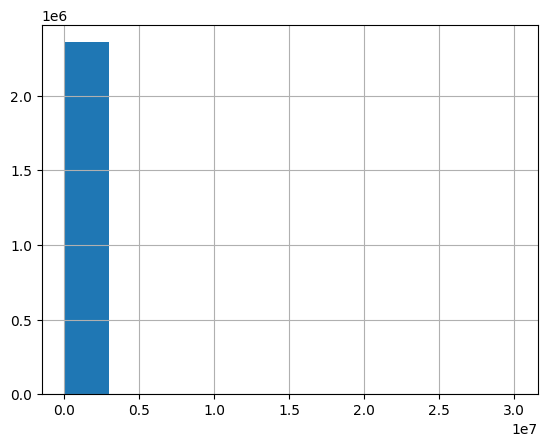

In [19]:
df_merged_filtered["length"].hist()

<AxesSubplot: >

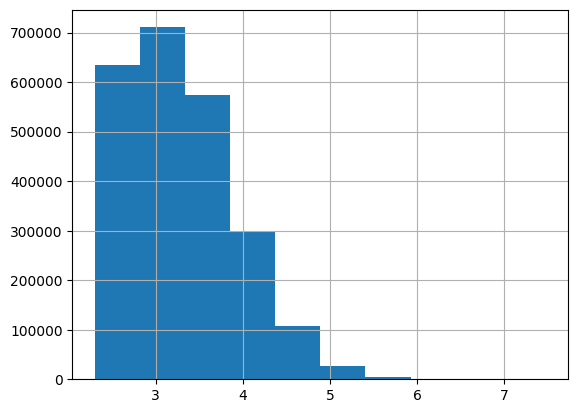

In [20]:
np.log10(df_merged_filtered["length"]).hist()

In [21]:
df_merged_filtered["unique"] = (
    df_merged_filtered[df_merged_filtered.columns[0:6]]
    .stack()
    .groupby(level=0)
    .apply(lambda x: x.unique().tolist())
)

In [22]:
df_merged_filtered["unique_filtered"] = [
    sorted(x)[0] for x in df_merged_filtered["unique"]
]

In [23]:
df_merged_filtered_bed = df_merged_filtered[
    ["chrom", "start", "end", "unique_filtered"]
]

In [24]:
df_merged_filtered_bed.to_csv(
    "chromhmm/merged_set_scored_unique_filtered.bed", sep="\t", header=None, index=False
)

and then sort

```
LC_ALL=C sort --parallel=8 -S 8G -k 1,1 -k 2,2n -k 3,3n /lustre1/project/stg_00090/scatac_benchmark/fixedcells_4_merged/chromhmm/merged_set_scored_unique_filtered.bed > chromhmm/merged_set_scored_unique_filtered_sorted.bed
```

In [25]:
!cat genomic_ranges.py
# script from ghuls

from __future__ import annotations

from typing import Literal

import numpy as np
import polars as pl
from ncls import NCLS


# Intersection/overlap code is based on:
#   https://github.com/biocore-ntnu/pyranges/blob/master/pyranges/methods/intersection.py


def _get_start_end_and_indexes_for_chrom(
    regions_per_chrom_dfs_pl: dict[str, pl.DataFrame],
    chrom: str,
) -> tuple[np.ndarray, np.ndarray, np.ndarray]:
    """
    Get start, end and index positions from per chromosome Polars dataframe.

    Parameters
    ----------
    regions_per_chrom_dfs_pl
        Dictionary of region dataframes partitioned by chromosome.
    chrom
        Chromosome name.

    Returns
    -------
    (starts, ends, indexes)
         Tuple of numpy arrays with starts, ends and index positions for the requested chromosome.

    """
    starts, ends, indexes = list(
        regions_per_chrom_dfs_pl[chrom]
        .with_row_count()
        .select(
            [
                pl.col("Start").cast(pl.

In [26]:
import genomic_ranges as gr

In [27]:
df_annotation = pl.read_csv(
    "chromhmm/merged_set_scored_unique_filtered_sorted.bed",
    sep="\t",
    has_header=False,
    new_columns=["Chromosome", "Start", "End", "ID"],
)

In [28]:
df_annotation = pl.read_csv(
    "chromhmm/merged_set_scored_unique_filtered_sorted.bed",
    sep="\t",
    has_header=False,
    new_columns=["Chromosome", "Start", "End", "ID"],
)

In [29]:
bcell_peak_path_dict = {
    x.split("/")[-2].split("__")[0]: x
    for x in sorted(
        glob.glob(
            "../fixedcells_3_cistopic_consensus/final_consensus_peaks/*/Bcell_summits.bed"
        )
    )
}

In [30]:
for sample, path in bcell_peak_path_dict.items():
    print(sample)

    df_peaks = pl.read_csv(
        path,
        sep="\t",
        has_header=False,
        new_columns=["Chromosome", "Start", "End", "ID"],
    )
    print(len(df_peaks))

BIO_ddseq_1.FIXEDCELLS
57701
BIO_ddseq_2.FIXEDCELLS
62368
BIO_ddseq_3.FIXEDCELLS
59383
BIO_ddseq_4.FIXEDCELLS
62871
BRO_mtscatac_1.FIXEDCELLS
71752
BRO_mtscatac_2.FIXEDCELLS
58383
CNA_10xmultiome_1.FIXEDCELLS
74017
CNA_10xmultiome_2.FIXEDCELLS
56656
CNA_10xv11_1.FIXEDCELLS
57249
CNA_10xv11_2.FIXEDCELLS
52223
CNA_10xv11_3.FIXEDCELLS
109204
CNA_10xv11_4.FIXEDCELLS
60050
CNA_10xv11_5.FIXEDCELLS
93974
CNA_10xv2_1.FIXEDCELLS
130659
CNA_10xv2_2.FIXEDCELLS
145489
CNA_hydrop_2.FIXEDCELLS
43706
CNA_hydrop_3.FIXEDCELLS
8785
CNA_mtscatac_1.FIXEDCELLS
53662
CNA_mtscatac_2.FIXEDCELLS
32664
EPF_hydrop_1.FIXEDCELLS
45063
EPF_hydrop_2.FIXEDCELLS
26942
EPF_hydrop_3.FIXEDCELLS
33573
EPF_hydrop_4.FIXEDCELLS
33886
HAR_ddseq_1.FIXEDCELLS
82924
HAR_ddseq_2.FIXEDCELLS
80476
MDC_mtscatac_1.FIXEDCELLS
97089
MDC_mtscatac_2.FIXEDCELLS
69003
OHS_s3atac_1.FIXEDCELLS
64256
OHS_s3atac_2.FIXEDCELLS
20100
SAN_10xmultiome_1.FIXEDCELLS
88741
SAN_10xmultiome_2.FIXEDCELLS
108238
STA_10xv11_1.FIXEDCELLS
24921
STA_10xv11_2.

In [31]:
df_annotation

Chromosome,Start,End,ID
str,i64,i64,str
"""chr1""",0,9800,"""E11"""
"""chr1""",0,15400,"""E11"""
"""chr1""",9800,10600,"""E10"""
"""chr1""",10600,15400,"""E11"""
"""chr1""",15400,18200,"""E8"""
"""chr1""",18200,138400,"""E11"""
"""chr1""",18200,180600,"""E11"""
"""chr1""",18200,180800,"""E11"""
"""chr1""",18200,185200,"""E11"""


In [32]:
df_intersect = gr.intersection(
    df_annotation,
    df_peaks,
    how="all",
    regions1_info=True,
    regions2_info=True,
    regions1_coord=True,
    regions2_coord=True,
)

In [33]:
df_intersect.groupby("ID@2").agg(pl.col("ID").n_unique())

ID@2,ID
str,u32
"""Bcell_peak_291...",2
"""Bcell_peak_294...",2
"""Bcell_peak_367...",1
"""Bcell_peak_726...",1
"""Bcell_peak_102...",2
"""Bcell_peak_250...",2
"""Bcell_peak_323...",1
"""Bcell_peak_367...",2
"""Bcell_peak_396...",1


In [34]:
df_pd_intersect = (
    df_intersect.groupby("ID@2")
    .agg(pl.col("ID").n_unique())
    .to_pandas()
    .set_index("ID@2")
)

array([[<AxesSubplot: title={'center': 'ID'}>]], dtype=object)

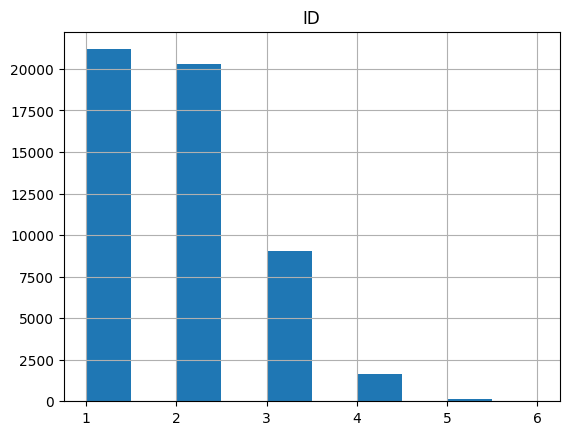

In [35]:
df_pd_intersect.hist()

In [36]:
df_intersect

Chromosome,Start,End,Chromosome@1,Start@1,End@1,Chromosome@2,Start@2,End@2,ID,ID@2,column_5@2
str,i64,i64,str,i64,i64,str,i64,i64,str,str,f64
"""chr1""",629946,629947,"""chr1""",191800,726200,"""chr1""",629946,629947,"""E11""","""Bcell_peak_1""",207.755
"""chr1""",634025,634026,"""chr1""",191800,726200,"""chr1""",634025,634026,"""E11""","""Bcell_peak_2""",2920.17
"""chr1""",634724,634725,"""chr1""",191800,726200,"""chr1""",634724,634725,"""E11""","""Bcell_peak_3""",66.541
"""chr1""",629946,629947,"""chr1""",191800,726600,"""chr1""",629946,629947,"""E11""","""Bcell_peak_1""",207.755
"""chr1""",634025,634026,"""chr1""",191800,726600,"""chr1""",634025,634026,"""E11""","""Bcell_peak_2""",2920.17
"""chr1""",634724,634725,"""chr1""",191800,726600,"""chr1""",634724,634725,"""E11""","""Bcell_peak_3""",66.541
"""chr1""",629946,629947,"""chr1""",191800,768200,"""chr1""",629946,629947,"""E11""","""Bcell_peak_1""",207.755
"""chr1""",634025,634026,"""chr1""",191800,768200,"""chr1""",634025,634026,"""E11""","""Bcell_peak_2""",2920.17
"""chr1""",634724,634725,"""chr1""",191800,768200,"""chr1""",634724,634725,"""E11""","""Bcell_peak_3""",66.541


In [37]:
?gr.intersection

Signature:
gr.intersection(
    regions1_df_pl: 'pl.DataFrame',
    regions2_df_pl: 'pl.DataFrame',
    how: "Literal[('all', 'containment', 'first', 'last')] | str | None" = None,
    regions1_info: 'bool' = True,
    regions2_info: 'bool' = False,
    regions1_coord: 'bool' = False,
    regions2_coord: 'bool' = False,
    regions1_suffix: 'str' = '@1',
    regions2_suffix: 'str' = '@2',
) -> 'pl.DataFrame'
Docstring:
Get overlapping subintervals between first set and second set of regions.

Parameters
----------
regions1_df_pl
    Polars DataFrame containing BED entries for first set of regions.
regions2_df_pl
    Polars DataFrame containing BED entries for second set of regions.
how
    What intervals to report:
      - "all" (None): all overlaps with second set or regions.
      - "containment": only overlaps where region of first set is contained within region of second set.
      - "first": first overlap with second set of regions.
      - "last": last overlap with second set of 

# for NBCB only

In [38]:
files = [
    "chromhmm/NBCB1_12_segments.bed",
    "chromhmm/NBCB2_12_segments.bed",
    "chromhmm/NBCB3_12_segments.bed",
]

  - Active Promoter = E1
  - Weak Promoter = E3
  - Poised Promoter = E4
  - Strong Enh = E2
  - Strong Enh2 = E6
  - Weak Enh = E5
  - Transcription Transition = E7
  - Transcription Elongation = E9
  - Weak Transcription = E8
  - Heterochrom,repressed = E10
  - Polycomb Repressed = E12
  - Heterochrom, low signal = E11

Created a merged dataframe based on outer join of the regions:

In [39]:
df_merged = pd.DataFrame()
for file in files:
    sample = file.split("/")[-1].split("_")[0]
    df = pd.read_csv(file, sep="\t", header=None)
    df.index = df[0] + ":" + df[1].astype(str) + "-" + df[2].astype(str)
    df.columns = ["chr", "begin", "end", sample]
    print(sample)
    print(df[sample].value_counts())
    print(df[sample].value_counts().sum())
    print("\n")

    if files.index(file) == 0:
        df_merged[sample] = df[sample]
    else:
        df_merged = df_merged.join(df[sample], how="outer")

# df_merged = df_merged.fillna("none")

NBCB1
E11    119836
E5      90198
E8      60875
E12     54571
E9      40504
E10     39093
E3      32061
E2      28030
E6      17133
E7      15490
E1      12785
E4      10495
Name: NBCB1, dtype: int64
521071


NBCB2
E11    93836
E8     65964
E5     51634
E9     43147
E12    40584
E10    33871
E2     29908
E6     26276
E3     23402
E1     21699
E7     11189
E4      7387
Name: NBCB2, dtype: int64
448897


NBCB3
E11    90250
E5     81970
E8     65591
E9     44274
E3     41598
E12    36918
E10    26740
E7     13891
E2     13127
E1     11122
E4      7685
E6      6024
Name: NBCB3, dtype: int64
439190




Check if the distributions between merged and single have remained the same:

In [40]:
for x in df_merged.columns[0:6]:
    print(df_merged[x].value_counts())
    print(df_merged[x].value_counts().sum())
    print("\n")

E11    119836
E5      90198
E8      60875
E12     54571
E9      40504
E10     39093
E3      32061
E2      28030
E6      17133
E7      15490
E1      12785
E4      10495
Name: NBCB1, dtype: int64
521071


E11    93836
E8     65964
E5     51634
E9     43147
E12    40584
E10    33871
E2     29908
E6     26276
E3     23402
E1     21699
E7     11189
E4      7387
Name: NBCB2, dtype: int64
448897


E11    90250
E5     81970
E8     65591
E9     44274
E3     41598
E12    36918
E10    26740
E7     13891
E2     13127
E1     11122
E4      7685
E6      6024
Name: NBCB3, dtype: int64
439190




Replace 'NaN' by 'none:

In [41]:
df_merged.fillna("none", inplace=True)

Now take only those regions that reach a consensus:

In [42]:
df_merged

,NBCB1,NBCB2,NBCB3
chr10:0-55200,E11,none,none
chr10:0-73600,none,E11,E11
chr10:100000600-100001200,E5,none,none
chr10:100000600-100002200,none,none,E5
chr10:100000800-100005000,none,E8,none
...,...,...,...
chrY:9287200-9288000,E10,none,none
chrY:9288000-9546400,E11,none,none
chrY:9546400-9548600,E10,none,none
chrY:9548600-10010600,E11,none,none


In [43]:
take = [len(set(df_merged.loc[x]) - {"none"}) == 1 for x in df_merged.index]

In [44]:
sum(take)

1318943

In [45]:
df_merged_filtered = df_merged.loc[take]

In [46]:
df_merged_filtered

,NBCB1,NBCB2,NBCB3
chr10:0-55200,E11,none,none
chr10:0-73600,none,E11,E11
chr10:100000600-100001200,E5,none,none
chr10:100000600-100002200,none,none,E5
chr10:100000800-100005000,none,E8,none
...,...,...,...
chrY:9287200-9288000,E10,none,none
chrY:9288000-9546400,E11,none,none
chrY:9546400-9548600,E10,none,none
chrY:9548600-10010600,E11,none,none


So we are now left with 2.359m regions.

In [47]:
df_merged_filtered.to_csv("chromhmm/NBCB_set.tsv", sep="\t")

Check distribution, how many regions appear in how many samples:

In [48]:
df_merged_filtered["score"] = df_merged_filtered.apply(
    lambda x: x.value_counts()["none"] if "none" in x.value_counts().index else 6,
    axis=1,
)

/tmp/ipykernel_2441742/414464534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_filtered["score"] = df_merged_filtered.apply(


In [49]:
df_merged_filtered.to_csv("chromhmm/NBCB_set_scored.tsv", sep="\t")

# Analyse

In [50]:
df_merged_filtered = pd.read_csv("chromhmm/NBCB_set_scored.tsv", sep="\t", index_col=0)

In [51]:
import seaborn as sns

In [52]:
df_merged_filtered

,NBCB1,NBCB2,NBCB3,score
chr10:0-55200,E11,none,none,2
chr10:0-73600,none,E11,E11,1
chr10:100000600-100001200,E5,none,none,2
chr10:100000600-100002200,none,none,E5,2
chr10:100000800-100005000,none,E8,none,2
...,...,...,...,...
chrY:9287200-9288000,E10,none,none,2
chrY:9288000-9546400,E11,none,none,2
chrY:9546400-9548600,E10,none,none,2
chrY:9548600-10010600,E11,none,none,2


In [53]:
df_merged_filtered["chrom"] = [x.split(":")[0] for x in df_merged_filtered.index]

In [54]:
df_merged_filtered["start"] = [
    int(x.split(":")[1].split("-")[0]) for x in df_merged_filtered.index
]
df_merged_filtered["end"] = [
    int(x.split(":")[1].split("-")[1]) for x in df_merged_filtered.index
]

In [55]:
df_merged_filtered["length"] = df_merged_filtered["end"] - df_merged_filtered["start"]

<AxesSubplot: >

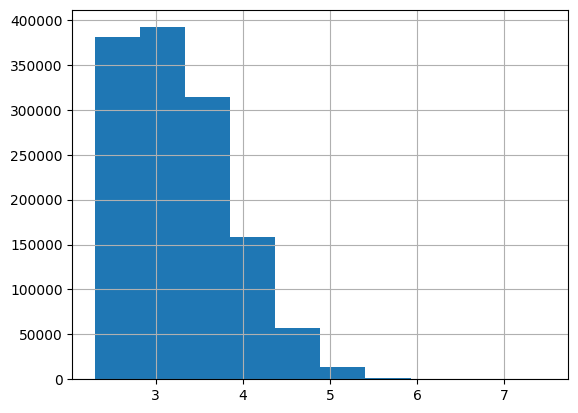

In [56]:
np.log10(df_merged_filtered["length"]).hist()

In [57]:
df_merged_filtered

,NBCB1,NBCB2,NBCB3,score,chrom,start,end,length
chr10:0-55200,E11,none,none,2,chr10,0,55200,55200
chr10:0-73600,none,E11,E11,1,chr10,0,73600,73600
chr10:100000600-100001200,E5,none,none,2,chr10,100000600,100001200,600
chr10:100000600-100002200,none,none,E5,2,chr10,100000600,100002200,1600
chr10:100000800-100005000,none,E8,none,2,chr10,100000800,100005000,4200
...,...,...,...,...,...,...,...,...
chrY:9287200-9288000,E10,none,none,2,chrY,9287200,9288000,800
chrY:9288000-9546400,E11,none,none,2,chrY,9288000,9546400,258400
chrY:9546400-9548600,E10,none,none,2,chrY,9546400,9548600,2200
chrY:9548600-10010600,E11,none,none,2,chrY,9548600,10010600,462000


In [58]:
df_merged_filtered["unique"] = (
    df_merged_filtered[df_merged_filtered.columns[0:3]]
    .stack()
    .groupby(level=0)
    .apply(lambda x: x.unique().tolist())
)

In [59]:
df_merged_filtered

,NBCB1,NBCB2,NBCB3,score,chrom,start,end,length,unique
chr10:0-55200,E11,none,none,2,chr10,0,55200,55200,"[E11, none]"
chr10:0-73600,none,E11,E11,1,chr10,0,73600,73600,"[none, E11]"
chr10:100000600-100001200,E5,none,none,2,chr10,100000600,100001200,600,"[E5, none]"
chr10:100000600-100002200,none,none,E5,2,chr10,100000600,100002200,1600,"[none, E5]"
chr10:100000800-100005000,none,E8,none,2,chr10,100000800,100005000,4200,"[none, E8]"
...,...,...,...,...,...,...,...,...,...
chrY:9287200-9288000,E10,none,none,2,chrY,9287200,9288000,800,"[E10, none]"
chrY:9288000-9546400,E11,none,none,2,chrY,9288000,9546400,258400,"[E11, none]"
chrY:9546400-9548600,E10,none,none,2,chrY,9546400,9548600,2200,"[E10, none]"
chrY:9548600-10010600,E11,none,none,2,chrY,9548600,10010600,462000,"[E11, none]"


In [60]:
df_merged_filtered["unique_filtered"] = [
    sorted(x)[0] for x in df_merged_filtered["unique"]
]

In [61]:
df_merged_filtered_bed = df_merged_filtered[
    ["chrom", "start", "end", "unique_filtered"]
]

In [62]:
df_merged_filtered_bed.to_csv(
    "chromhmm/NBCB_set_scored_unique_filtered.bed", sep="\t", header=None, index=False
)

and then sort

```
LC_ALL=C sort --parallel=8 -S 8G -k 1,1 -k 2,2n -k 3,3n /lustre1/project/stg_00090/scatac_benchmark/fixedcells_4_merged/chromhmm/NBCB_set_scored_unique_filtered.bed > chromhmm/NBCB_set_scored_unique_filtered_sorted.bed
```

# Analyse

In [63]:
!cat genomic_ranges.py
# script from ghuls

from __future__ import annotations

from typing import Literal

import numpy as np
import polars as pl
from ncls import NCLS


# Intersection/overlap code is based on:
#   https://github.com/biocore-ntnu/pyranges/blob/master/pyranges/methods/intersection.py


def _get_start_end_and_indexes_for_chrom(
    regions_per_chrom_dfs_pl: dict[str, pl.DataFrame],
    chrom: str,
) -> tuple[np.ndarray, np.ndarray, np.ndarray]:
    """
    Get start, end and index positions from per chromosome Polars dataframe.

    Parameters
    ----------
    regions_per_chrom_dfs_pl
        Dictionary of region dataframes partitioned by chromosome.
    chrom
        Chromosome name.

    Returns
    -------
    (starts, ends, indexes)
         Tuple of numpy arrays with starts, ends and index positions for the requested chromosome.

    """
    starts, ends, indexes = list(
        regions_per_chrom_dfs_pl[chrom]
        .with_row_count()
        .select(
            [
                pl.col("Start").cast(pl.

In [64]:
import genomic_ranges as gr

In [65]:
df_annotation = pl.read_csv(
    "chromhmm/NBCB_set_scored_unique_filtered_sorted.bed",
    sep="\t",
    has_header=False,
    new_columns=["Chromosome", "Start", "End", "ID"],
)

In [66]:
bcell_peak_path_dict = {
    x.split("/")[-2].split("__")[0]: x
    for x in sorted(
        glob.glob(
            "../fixedcells_3_cistopic_consensus/final_consensus_peaks/*/Bcell_summits.bed"
        )
    )
}

In [67]:
for sample, path in bcell_peak_path_dict.items():
    print(sample)

    df_peaks = pl.read_csv(
        path,
        sep="\t",
        has_header=False,
        new_columns=["Chromosome", "Start", "End", "ID"],
    )
    print(len(df_peaks))

BIO_ddseq_1.FIXEDCELLS
57701
BIO_ddseq_2.FIXEDCELLS
62368
BIO_ddseq_3.FIXEDCELLS
59383
BIO_ddseq_4.FIXEDCELLS
62871
BRO_mtscatac_1.FIXEDCELLS
71752
BRO_mtscatac_2.FIXEDCELLS
58383
CNA_10xmultiome_1.FIXEDCELLS
74017
CNA_10xmultiome_2.FIXEDCELLS
56656
CNA_10xv11_1.FIXEDCELLS
57249
CNA_10xv11_2.FIXEDCELLS
52223
CNA_10xv11_3.FIXEDCELLS
109204
CNA_10xv11_4.FIXEDCELLS
60050
CNA_10xv11_5.FIXEDCELLS
93974
CNA_10xv2_1.FIXEDCELLS
130659
CNA_10xv2_2.FIXEDCELLS
145489
CNA_hydrop_2.FIXEDCELLS
43706
CNA_hydrop_3.FIXEDCELLS
8785
CNA_mtscatac_1.FIXEDCELLS
53662
CNA_mtscatac_2.FIXEDCELLS
32664
EPF_hydrop_1.FIXEDCELLS
45063
EPF_hydrop_2.FIXEDCELLS
26942
EPF_hydrop_3.FIXEDCELLS
33573
EPF_hydrop_4.FIXEDCELLS
33886
HAR_ddseq_1.FIXEDCELLS
82924
HAR_ddseq_2.FIXEDCELLS
80476
MDC_mtscatac_1.FIXEDCELLS
97089
MDC_mtscatac_2.FIXEDCELLS
69003
OHS_s3atac_1.FIXEDCELLS
64256
OHS_s3atac_2.FIXEDCELLS
20100
SAN_10xmultiome_1.FIXEDCELLS
88741
SAN_10xmultiome_2.FIXEDCELLS
108238
STA_10xv11_1.FIXEDCELLS
24921
STA_10xv11_2.

In [68]:
df_annotation

Chromosome,Start,End,ID
str,i64,i64,str
"""chr1""",0,9800,"""E11"""
"""chr1""",0,15400,"""E11"""
"""chr1""",9800,10600,"""E10"""
"""chr1""",10600,15400,"""E11"""
"""chr1""",15400,18200,"""E8"""
"""chr1""",18200,138400,"""E11"""
"""chr1""",18200,180600,"""E11"""
"""chr1""",138400,140000,"""E8"""
"""chr1""",140000,180600,"""E11"""


In [69]:
df_intersect = gr.intersection(
    df_annotation,
    df_peaks,
    how="all",
    regions1_info=True,
    regions2_info=True,
    regions1_coord=True,
    regions2_coord=True,
)

In [70]:
df_intersect.groupby("ID@2").agg(pl.col("ID").unique())

ID@2,ID
str,list[str]
"""Bcell_peak_394...","[""E5"", ""E11""]"
"""Bcell_peak_412...","[""E5"", ""E11""]"
"""Bcell_peak_234...","[""E2""]"
"""Bcell_peak_109...","[""E1""]"
"""Bcell_peak_313...","[""E6""]"
"""Bcell_peak_267...","[""E1""]"
"""Bcell_peak_160...","[""E7""]"
"""Bcell_peak_274...","[""E6"", ""E1"", ""E2""]"
"""Bcell_peak_303...","[""E8""]"


In [71]:
df_pd_intersect = (
    df_intersect.groupby("ID@2")
    .agg(pl.col("ID").n_unique())
    .to_pandas()
    .set_index("ID@2")
)

array([[<AxesSubplot: title={'center': 'ID'}>]], dtype=object)

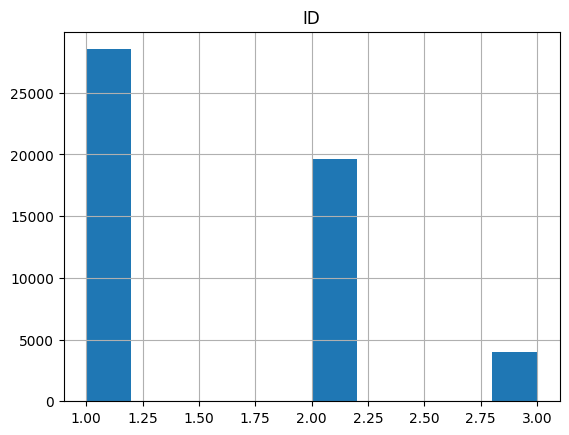

In [72]:
df_pd_intersect.hist()

In [73]:
df_intersect.groupby("ID").agg(pl.col("ID@2").n_unique()).sort(pl.col("ID"))

ID,ID@2
str,u32
"""E1""",23204
"""E10""",264
"""E11""",8355
"""E12""",1326
"""E2""",8492
"""E3""",12891
"""E4""",2207
"""E5""",11128
"""E6""",6433


In [74]:
df_intersect.groupby("ID@2").agg(pl.col("ID").unique())

ID@2,ID
str,list[str]
"""Bcell_peak_185...","[""E1"", ""E3""]"
"""Bcell_peak_658...","[""E3"", ""E1"", ""E2""]"
"""Bcell_peak_266...","[""E11"", ""E5""]"
"""Bcell_peak_288...","[""E1"", ""E2""]"
"""Bcell_peak_306...","[""E5""]"
"""Bcell_peak_392...","[""E5""]"
"""Bcell_peak_436...","[""E11""]"
"""Bcell_peak_162...","[""E1"", ""E2""]"
"""Bcell_peak_180...","[""E3"", ""E2""]"


In [75]:
df_intersect.groupby("ID@2").agg(pl.col("ID").unique()).to_pandas().set_index("ID@2")

,ID
ID@2,
Bcell_peak_1794b,[E1]
Bcell_peak_19788,"[E3, E1]"
Bcell_peak_26169,"[E3, E5, E1]"
Bcell_peak_30347,"[E3, E5]"
Bcell_peak_44612,[E11]
...,...
Bcell_peak_18854,[E3]
Bcell_peak_16690,[E1]
Bcell_peak_36149,"[E5, E3]"


In [76]:
df_pd_intersect = (
    df_intersect.groupby("ID@2")
    .agg(pl.col("ID").unique())
    .to_pandas()
    .set_index("ID@2")
)

In [77]:
df_pd_intersect["joined"] = ["_".join(x) for x in df_pd_intersect["ID"]]
df_pd_intersect["joined_set"] = [set(x) for x in df_pd_intersect["ID"]]

In [78]:
pd.DataFrame(df_pd_intersect["joined_set"].value_counts())

,joined_set
{E1},14361
{E11},4147
"{E3, E1}",3723
"{E5, E6}",2578
"{E5, E11}",2478
...,...
"{E10, E1}",1
"{E5, E1, E12}",1
"{E10, E3, E5}",1
"{E2, E1, E11}",1


  - Active Promoter = E1
  - Strong Enh = E2
  - Weak Promoter = E3
  - Poised Promoter = E4
  - Weak Enh = E5
  - Strong Enh2 = E6
  - Transcription Transition = E7
  - Weak Transcription = E8
  - Transcription Elongation = E9
  - Heterochrom,repressed = E10
  - Heterochrom, low signal = E11
  - Polycomb Repressed = E12

In [79]:
list(pd.DataFrame(df_pd_intersect["joined_set"].value_counts()).index)

[{'E1'},
 {'E11'},
 {'E1', 'E3'},
 {'E5', 'E6'},
 {'E11', 'E5'},
 {'E5'},
 {'E1', 'E2'},
 {'E3'},
 {'E2', 'E3'},
 {'E1', 'E2', 'E3'},
 {'E2'},
 {'E4'},
 {'E3', 'E5'},
 {'E6'},
 {'E5', 'E8'},
 {'E9'},
 {'E3', 'E6'},
 {'E11', 'E12'},
 {'E8'},
 {'E7'},
 {'E3', 'E4'},
 {'E2', 'E6'},
 {'E11', 'E8'},
 {'E7', 'E9'},
 {'E12'},
 {'E8', 'E9'},
 {'E2', 'E3', 'E6'},
 {'E3', 'E5', 'E6'},
 {'E1', 'E6'},
 {'E1', 'E3', 'E6'},
 {'E6', 'E7'},
 {'E12', 'E4'},
 {'E2', 'E5', 'E6'},
 {'E11', 'E3'},
 {'E11', 'E3', 'E5'},
 {'E11', 'E5', 'E8'},
 {'E2', 'E5'},
 {'E2', 'E7'},
 {'E5', 'E7'},
 {'E1', 'E5'},
 {'E1', 'E3', 'E4'},
 {'E1', 'E5', 'E6'},
 {'E10', 'E11'},
 {'E7', 'E8'},
 {'E1', 'E2', 'E6'},
 {'E12', 'E5'},
 {'E2', 'E3', 'E5'},
 {'E1', 'E3', 'E5'},
 {'E4', 'E5'},
 {'E10'},
 {'E5', 'E6', 'E7'},
 {'E1', 'E4'},
 {'E11', 'E12', 'E5'},
 {'E12', 'E4', 'E5'},
 {'E5', 'E7', 'E8'},
 {'E11', 'E5', 'E6'},
 {'E10', 'E5'},
 {'E7', 'E8', 'E9'},
 {'E1', 'E11'},
 {'E5', 'E6', 'E8'},
 {'E2', 'E3', 'E4'},
 {'E11', 'E12', '

# let's collapse some of these annotations:

In [80]:
collapse_dict = {
    "E1": "Promoter",
    "E2": "Enhancer",
    "E3": "Promoter",
    "E4": "Promoter",
    "E5": "Enhancer",
    "E6": "Enhancer",
    "E7": "Transcription",
    "E8": "Transcription",
    "E9": "Transcription",
    "E10": "Heterochromatin",
    "E11": "Heterochromatin",
    "E12": "Polycomb, repressed",
}

In [81]:
collapse_dict.values()

dict_values(['Promoter', 'Enhancer', 'Promoter', 'Promoter', 'Enhancer', 'Enhancer', 'Transcription', 'Transcription', 'Transcription', 'Heterochromatin', 'Heterochromatin', 'Polycomb, repressed'])

In [82]:
mapping_df = pl.DataFrame(
    {
        "old": [
            "E1",
            "E2",
            "E3",
            "E4",
            "E5",
            "E6",
            "E7",
            "E8",
            "E9",
            "E10",
            "E11",
            "E12",
        ],
        "new": [
            "Promoter",
            "Enhancer",
            "Promoter",
            "Promoter",
            "Enhancer",
            "Enhancer",
            "Transcription",
            "Transcription",
            "Transcription",
            "Heterochromatin",
            "Heterochromatin",
            "Polycomb, repressed",
        ],
    }
)

In [83]:
mapping_df

old,new
str,str
"""E1""","""Promoter"""
"""E2""","""Enhancer"""
"""E3""","""Promoter"""
"""E4""","""Promoter"""
"""E5""","""Enhancer"""
"""E6""","""Enhancer"""
"""E7""","""Transcription"""
"""E8""","""Transcription"""
"""E9""","""Transcription"""


In [84]:
df_annotation

Chromosome,Start,End,ID
str,i64,i64,str
"""chr1""",0,9800,"""E11"""
"""chr1""",0,15400,"""E11"""
"""chr1""",9800,10600,"""E10"""
"""chr1""",10600,15400,"""E11"""
"""chr1""",15400,18200,"""E8"""
"""chr1""",18200,138400,"""E11"""
"""chr1""",18200,180600,"""E11"""
"""chr1""",138400,140000,"""E8"""
"""chr1""",140000,180600,"""E11"""


In [85]:
df_annotation_collapsed = df_annotation.join(
    mapping_df, how="inner", left_on="ID", right_on="old"
)

# retry now with collapsed annotation

In [86]:
df_peaks

Chromosome,Start,End,ID,column_5
str,i64,i64,str,f64
"""chr1""",629946,629947,"""Bcell_peak_1""",207.755
"""chr1""",634025,634026,"""Bcell_peak_2""",2920.17
"""chr1""",634724,634725,"""Bcell_peak_3""",66.541
"""chr1""",778473,778474,"""Bcell_peak_4a""",9.00758
"""chr1""",778717,778718,"""Bcell_peak_4b""",96.3736
"""chr1""",827526,827527,"""Bcell_peak_5""",11.0242
"""chr1""",865842,865843,"""Bcell_peak_6""",1.7712
"""chr1""",869885,869886,"""Bcell_peak_7""",40.8901
"""chr1""",904719,904720,"""Bcell_peak_8""",19.6048


In [87]:
df_intersect = gr.intersection(
    df_annotation_collapsed,
    df_peaks,
    how="all",
    regions1_info=True,
    regions2_info=True,
    regions1_coord=True,
    regions2_coord=True,
)

In [88]:
df_intersect.groupby("ID@2").agg(pl.col("new").unique())

ID@2,new
str,list[str]
"""Bcell_peak_433...","[""Promoter""]"
"""Bcell_peak_220...","[""Enhancer""]"
"""Bcell_peak_437...","[""Enhancer"", ""Promoter""]"
"""Bcell_peak_453...","[""Promoter""]"
"""Bcell_peak_116...","[""Promoter""]"
"""Bcell_peak_648...","[""Promoter""]"
"""Bcell_peak_461...","[""Transcription"", ""Enhancer""]"
"""Bcell_peak_234...","[""Enhancer""]"
"""Bcell_peak_167...","[""Promoter""]"


In [89]:
df_pd_intersect = (
    df_intersect.groupby("ID@2")
    .agg(pl.col("new").n_unique())
    .to_pandas()
    .set_index("ID@2")
)

array([[<AxesSubplot: title={'center': 'new'}>]], dtype=object)

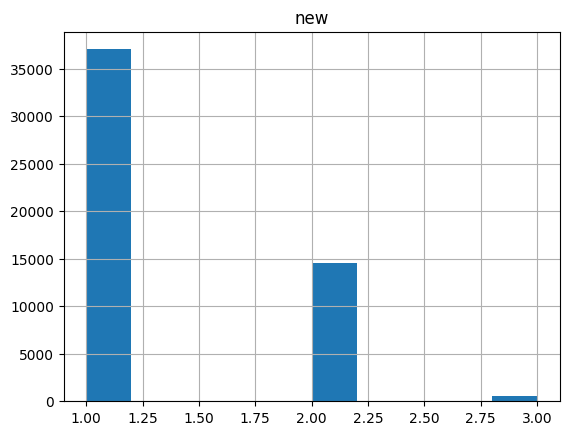

In [90]:
df_pd_intersect.hist()

In [91]:
df_intersect.groupby("new").agg(pl.col("ID@2").n_unique()).sort(pl.col("new"))

new,ID@2
str,u32
"""Enhancer""",21605
"""Heterochromati...",8506
"""Polycomb, repr...",1326
"""Promoter""",31740
"""Transcription""",4685


In [92]:
df_intersect.groupby("ID@2").agg(pl.col("new").unique())

ID@2,new
str,list[str]
"""Bcell_peak_110...","[""Promoter""]"
"""Bcell_peak_610...","[""Enhancer""]"
"""Bcell_peak_256...","[""Promoter""]"
"""Bcell_peak_299...","[""Enhancer""]"
"""Bcell_peak_326...","[""Promoter""]"
"""Bcell_peak_370...","[""Enhancer""]"
"""Bcell_peak_369...","[""Promoter"", ""Enhancer""]"
"""Bcell_peak_308...","[""Promoter""]"
"""Bcell_peak_396...","[""Enhancer""]"


In [93]:
df_pd_intersect = (
    df_intersect.groupby("ID@2")
    .agg(pl.col("new").unique())
    .to_pandas()
    .set_index("ID@2")
)

In [94]:
df_pd_intersect["joined"] = ["_".join(x) for x in df_pd_intersect["new"]]
df_pd_intersect["joined_set"] = [set(x) for x in df_pd_intersect["new"]]

In [95]:
pd.DataFrame(df_pd_intersect["joined_set"].value_counts())

,joined_set
{Promoter},21884
"{Enhancer, Promoter}",8985
{Enhancer},7995
{Heterochromatin},4296
"{Enhancer, Heterochromatin}",2604
{Transcription},2576
"{Transcription, Enhancer}",1428
"{Polycomb, repressed, Heterochromatin}",606
"{Transcription, Heterochromatin}",371
"{Polycomb, repressed}",277


  - Active Promoter = E1
  - Strong Enh = E2
  - Weak Promoter = E3
  - Poised Promoter = E4
  - Weak Enh = E5
  - Strong Enh2 = E6
  - Transcription Transition = E7
  - Weak Transcription = E8
  - Transcription Elongation = E9
  - Heterochrom,repressed = E10
  - Heterochrom, low signal = E11
  - Polycomb Repressed = E12

In [96]:
list(pd.DataFrame(df_pd_intersect["joined_set"].value_counts()).index)

[{'Promoter'},
 {'Enhancer', 'Promoter'},
 {'Enhancer'},
 {'Heterochromatin'},
 {'Enhancer', 'Heterochromatin'},
 {'Transcription'},
 {'Enhancer', 'Transcription'},
 {'Heterochromatin', 'Polycomb, repressed'},
 {'Heterochromatin', 'Transcription'},
 {'Polycomb, repressed'},
 {'Heterochromatin', 'Promoter'},
 {'Polycomb, repressed', 'Promoter'},
 {'Enhancer', 'Heterochromatin', 'Promoter'},
 {'Enhancer', 'Heterochromatin', 'Transcription'},
 {'Enhancer', 'Polycomb, repressed'},
 {'Enhancer', 'Promoter', 'Transcription'},
 {'Promoter', 'Transcription'},
 {'Enhancer', 'Polycomb, repressed', 'Promoter'},
 {'Enhancer', 'Heterochromatin', 'Polycomb, repressed'},
 {'Heterochromatin', 'Polycomb, repressed', 'Promoter'},
 {'Heterochromatin', 'Promoter', 'Transcription'},
 {'Enhancer', 'Polycomb, repressed', 'Transcription'},
 {'Heterochromatin', 'Polycomb, repressed', 'Transcription'}]

# select only unambiguously mapping regions

In [97]:
unique_assignments = (
    df_intersect.groupby("ID@2")
    .agg(pl.col("new").n_unique())
    .filter(pl.col("new") == 1)
)

In [98]:
df_intersect.select(pl.col(["ID@2", "new"])).join(
    unique_assignments, left_on="ID@2", right_on="ID@2", how="inner"
).unique()

ID@2,new,new_right
str,str,u32
"""Bcell_peak_1""","""Heterochromati...",1
"""Bcell_peak_2""","""Heterochromati...",1
"""Bcell_peak_3""","""Heterochromati...",1
"""Bcell_peak_4a""","""Promoter""",1
"""Bcell_peak_4b""","""Promoter""",1
"""Bcell_peak_5""","""Promoter""",1
"""Bcell_peak_7""","""Promoter""",1
"""Bcell_peak_8""","""Promoter""",1
"""Bcell_peak_9""","""Promoter""",1


In [101]:
df_intersect.select(pl.col(["ID@2", "new"])).join(
    unique_assignments, left_on="ID@2", right_on="ID@2", how="anti"
).select(pl.col("ID@2").unique())

ID@2
str
"""Bcell_peak_303..."
"""Bcell_peak_580..."
"""Bcell_peak_110..."
"""Bcell_peak_301..."
"""Bcell_peak_593..."
"""Bcell_peak_285..."
"""Bcell_peak_112..."
"""Bcell_peak_363..."
"""Bcell_peak_411..."


In [102]:
37028 + 15141

52169

In [103]:
52342 - (37028 + 15141)

173

In [104]:
df_peaks

Chromosome,Start,End,ID,column_5
str,i64,i64,str,f64
"""chr1""",629946,629947,"""Bcell_peak_1""",207.755
"""chr1""",634025,634026,"""Bcell_peak_2""",2920.17
"""chr1""",634724,634725,"""Bcell_peak_3""",66.541
"""chr1""",778473,778474,"""Bcell_peak_4a""",9.00758
"""chr1""",778717,778718,"""Bcell_peak_4b""",96.3736
"""chr1""",827526,827527,"""Bcell_peak_5""",11.0242
"""chr1""",865842,865843,"""Bcell_peak_6""",1.7712
"""chr1""",869885,869886,"""Bcell_peak_7""",40.8901
"""chr1""",904719,904720,"""Bcell_peak_8""",19.6048


In [105]:
unique_assignments = (
    df_intersect.groupby("ID@2").agg(pl.col("new").n_unique()).filter(pl.col("new") > 1)
)

# Generate figure

In [120]:
bcell_peak_path_dict = {
    x.split("/")[-2].split("__")[0]: x
    for x in sorted(
        glob.glob(
            "../fixedcells_3_cistopic_consensus/final_consensus_peaks/*/Bcell_summits.bed"
        )
    )
}

In [121]:
df_annotation = pl.read_csv(
    "/lustre1/project/stg_00090/scatac_benchmark/fixedcells_4_merged/chromhmm/NBCB_set_scored_unique_filtered_sorted.bed",
    sep="\t",
    has_header=False,
    new_columns=["Chromosome", "Start", "End", "ID"],
)

mapping_df = pl.DataFrame(
    {
        "old": [
            "E1",
            "E2",
            "E3",
            "E4",
            "E5",
            "E6",
            "E7",
            "E8",
            "E9",
            "E10",
            "E11",
            "E12",
        ],
        "new": [
            "Promoter",
            "Enhancer",
            "Promoter",
            "Promoter",
            "Enhancer",
            "Enhancer",
            "Transcription",
            "Transcription",
            "Transcription",
            "Heterochromatin",
            "Heterochromatin",
            "Polycomb, repressed",
        ],
    }
)

df_annotation_collapsed = df_annotation.join(
    mapping_df, how="inner", left_on="ID", right_on="old"
)

bcell_peak_path_dict = {
    x.split("/")[-2].split("__")[0]: x
    for x in sorted(
        glob.glob(
            "/lustre1/project/stg_00090/scatac_benchmark/fixedcells_3_cistopic_consensus/final_consensus_peaks/*/Bcell_summits.bed"
        )
    )
}

In [122]:
df_merged = pd.DataFrame()
for sample, path in bcell_peak_path_dict.items():
    print(sample)

    df_peaks = pl.read_csv(
        path,
        sep="\t",
        has_header=False,
        new_columns=["Chromosome", "Start", "End", "ID"],
    )
    print(len(df_peaks))

    df_intersect = gr.intersection(
        df_annotation_collapsed,
        df_peaks,
        how="all",
        regions1_info=True,
        regions2_info=True,
        regions1_coord=True,
        regions2_coord=True,
    )

    unique_assignments = (
        df_intersect.groupby("ID@2")
        .agg(pl.col("new").n_unique())
        .filter(pl.col("new") == 1)
    )

    df_regions_with_unique_assignments = (
        df_intersect.select(pl.col(["ID@2", "new"]))
        .join(unique_assignments, left_on="ID@2", right_on="ID@2", how="inner")
        .unique()
    )

    df_counts = pd.DataFrame(
        df_regions_with_unique_assignments.to_pandas()
        .set_index("ID@2")["new"]
        .value_counts()
    )

    df_counts.columns = [sample]

    df_regions_with_ambiguous_assignments = (
        df_intersect.select(pl.col(["ID@2", "new"]))
        .join(unique_assignments, left_on="ID@2", right_on="ID@2", how="anti")
        .select(pl.col("ID@2").unique())
    )
    df_counts.loc["Ambiguous"] = len(df_regions_with_ambiguous_assignments)
    df_counts.loc["Unassigned"] = len(df_peaks) - df_counts.sum()
    df_merged = pd.concat([df_merged, df_counts], axis=1)

BIO_ddseq_1.FIXEDCELLS
57701
BIO_ddseq_2.FIXEDCELLS
62368
BIO_ddseq_3.FIXEDCELLS
59383
BIO_ddseq_4.FIXEDCELLS
62871
BRO_mtscatac_1.FIXEDCELLS
71752
BRO_mtscatac_2.FIXEDCELLS
58383
CNA_10xmultiome_1.FIXEDCELLS
74017
CNA_10xmultiome_2.FIXEDCELLS
56656
CNA_10xv11_1.FIXEDCELLS
57249
CNA_10xv11_2.FIXEDCELLS
52223
CNA_10xv11_3.FIXEDCELLS
109204
CNA_10xv11_4.FIXEDCELLS
60050
CNA_10xv11_5.FIXEDCELLS
93974
CNA_10xv2_1.FIXEDCELLS
130659
CNA_10xv2_2.FIXEDCELLS
145489
CNA_hydrop_2.FIXEDCELLS
43706
CNA_hydrop_3.FIXEDCELLS
8785
CNA_mtscatac_1.FIXEDCELLS
53662
CNA_mtscatac_2.FIXEDCELLS
32664
EPF_hydrop_1.FIXEDCELLS
45063
EPF_hydrop_2.FIXEDCELLS
26942
EPF_hydrop_3.FIXEDCELLS
33573
EPF_hydrop_4.FIXEDCELLS
33886
HAR_ddseq_1.FIXEDCELLS
82924
HAR_ddseq_2.FIXEDCELLS
80476
MDC_mtscatac_1.FIXEDCELLS
97089
MDC_mtscatac_2.FIXEDCELLS
69003
OHS_s3atac_1.FIXEDCELLS
64256
OHS_s3atac_2.FIXEDCELLS
20100
SAN_10xmultiome_1.FIXEDCELLS
88741
SAN_10xmultiome_2.FIXEDCELLS
108238
STA_10xv11_1.FIXEDCELLS
24921
STA_10xv11_2.

In [123]:
df_merged = df_merged.T

In [124]:
df_merged

,Promoter,Enhancer,Heterochromatin,Transcription,"Polycomb, repressed",Ambiguous,Unassigned
BIO_ddseq_1.FIXEDCELLS,24235,9048,3230,3013,421,17583,171
BIO_ddseq_2.FIXEDCELLS,24086,10545,4050,4662,351,18493,181
BIO_ddseq_3.FIXEDCELLS,22599,9483,5908,4004,406,16797,186
BIO_ddseq_4.FIXEDCELLS,23321,10099,6497,4521,439,17815,179
BRO_mtscatac_1.FIXEDCELLS,24807,14910,5142,3535,210,22916,232
BRO_mtscatac_2.FIXEDCELLS,22688,11965,3159,2339,132,17928,172
CNA_10xmultiome_1.FIXEDCELLS,26118,14578,4688,4366,340,23681,246
CNA_10xmultiome_2.FIXEDCELLS,23567,9384,3175,2711,241,17402,176
CNA_10xv11_1.FIXEDCELLS,21429,11734,3136,2305,138,18307,200
CNA_10xv11_2.FIXEDCELLS,20654,10767,2251,1864,94,16406,187


In [125]:
df_merged = df_merged.div(df_merged.sum(axis=1), axis=0)

In [126]:
df_merged.to_csv("chromhmm/final_df_toplot_overlaps_peaks.tsv", sep="\t")

# do this for DARs

In [127]:
bcell_peak_path_dict = {
    x.split("/")[-2].split("__")[0]: x
    for x in sorted(
        glob.glob(
            "/user/leuven/330/vsc33042/fderop/data/99999999_scatac_benchmark/fixedcells_3_cistopic_consensus/downstream_analysis/DARs/*/*B_cell__DARs__unique.bed"
        )
    )
}

In [128]:
for sample, df_path in bcell_peak_path_dict.items():
    print(sample)
    df = pd.read_csv(df_path, sep="\t", header=None)

    ["_" + str(x) for x in range(len(df))]
    df[3] = df[3] + ["_" + str(x) for x in range(len(df))]

    df.to_csv(df_path.replace(".bed", "__unique.bed"), sep="\t", index=False)

BIO_ddseq_1.FIXEDCELLS
BIO_ddseq_2.FIXEDCELLS
BIO_ddseq_3.FIXEDCELLS
BIO_ddseq_4.FIXEDCELLS
BRO_mtscatac_1.FIXEDCELLS
BRO_mtscatac_2.FIXEDCELLS
CNA_10xmultiome_1.FIXEDCELLS
CNA_10xmultiome_2.FIXEDCELLS
CNA_10xv11_1.FIXEDCELLS
CNA_10xv11_2.FIXEDCELLS
CNA_10xv11_3.FIXEDCELLS
CNA_10xv11_4.FIXEDCELLS
CNA_10xv11_5.FIXEDCELLS
CNA_10xv2_1.FIXEDCELLS
CNA_10xv2_2.FIXEDCELLS
CNA_hydrop_2.FIXEDCELLS
CNA_mtscatac_1.FIXEDCELLS
CNA_mtscatac_2.FIXEDCELLS
EPF_hydrop_1.FIXEDCELLS
EPF_hydrop_2.FIXEDCELLS
EPF_hydrop_3.FIXEDCELLS
EPF_hydrop_4.FIXEDCELLS
HAR_ddseq_1.FIXEDCELLS
HAR_ddseq_2.FIXEDCELLS
MDC_mtscatac_1.FIXEDCELLS
MDC_mtscatac_2.FIXEDCELLS
OHS_s3atac_1.FIXEDCELLS
OHS_s3atac_2.FIXEDCELLS
SAN_10xmultiome_1.FIXEDCELLS
SAN_10xmultiome_2.FIXEDCELLS
STA_10xv11_1.FIXEDCELLS
STA_10xv11_2.FIXEDCELLS
TXG_10xv11_1.FIXEDCELLS
TXG_10xv2_1.FIXEDCELLS
TXG_10xv2_2.FIXEDCELLS
UCS_ddseq_1.FIXEDCELLS
UCS_ddseq_2.FIXEDCELLS
VIB_10xmultiome_1.FIXEDCELLS
VIB_10xmultiome_2.FIXEDCELLS
VIB_10xv1_1.FIXEDCELLS
VIB_10xv1_2

In [129]:
df_annotation = pl.read_csv(
    "/lustre1/project/stg_00090/scatac_benchmark/fixedcells_4_merged/chromhmm/NBCB_set_scored_unique_filtered_sorted.bed",
    sep="\t",
    has_header=False,
    new_columns=["Chromosome", "Start", "End", "ID"],
)

mapping_df = pl.DataFrame(
    {
        "old": [
            "E1",
            "E2",
            "E3",
            "E4",
            "E5",
            "E6",
            "E7",
            "E8",
            "E9",
            "E10",
            "E11",
            "E12",
        ],
        "new": [
            "Promoter",
            "Enhancer",
            "Promoter",
            "Promoter",
            "Enhancer",
            "Enhancer",
            "Transcription",
            "Transcription",
            "Transcription",
            "Heterochromatin",
            "Heterochromatin",
            "Polycomb, repressed",
        ],
    }
)

df_annotation_collapsed = df_annotation.join(
    mapping_df, how="inner", left_on="ID", right_on="old"
)

bcell_peak_path_dict = {
    x.split("/")[-2].split("__")[0]: x
    for x in sorted(
        glob.glob(
            "/user/leuven/330/vsc33042/fderop/data/99999999_scatac_benchmark/fixedcells_3_cistopic_consensus/downstream_analysis/DARs/*/*B_cell__DARs__unique.bed"
        )
    )
}

In [130]:
df_merged = pd.DataFrame()
for sample, path in bcell_peak_path_dict.items():
    print(sample)

    df_peaks = pl.read_csv(
        path,
        sep="\t",
        has_header=False,
        new_columns=["Chromosome", "Start", "End", "ID"],
    )
    print(len(df_peaks))
    df_peaks.lazy().select(
        [pl.col("Start").apply(lambda x: x + 249), pl.exclude("Start")]
    ).collect()

    df_peaks.lazy().select(
        [pl.col("End").apply(lambda x: x - 249), pl.exclude("End")]
    ).collect()

    df_intersect = gr.intersection(
        df_annotation_collapsed,
        df_peaks,
        how="all",
        regions1_info=True,
        regions2_info=True,
        regions1_coord=True,
        regions2_coord=True,
    )

    unique_assignments = (
        df_intersect.groupby("ID@2")
        .agg(pl.col("new").n_unique())
        .filter(pl.col("new") == 1)
    )

    df_regions_with_unique_assignments = (
        df_intersect.select(pl.col(["ID@2", "new"]))
        .join(unique_assignments, left_on="ID@2", right_on="ID@2", how="inner")
        .unique()
    )

    df_counts = pd.DataFrame(
        df_regions_with_unique_assignments.to_pandas()
        .set_index("ID@2")["new"]
        .value_counts()
    )

    df_counts.columns = [sample]

    df_regions_with_ambiguous_assignments = (
        df_intersect.select(pl.col(["ID@2", "new"]))
        .join(unique_assignments, left_on="ID@2", right_on="ID@2", how="anti")
        .select(pl.col("ID@2").unique())
    )
    df_counts.loc["Ambiguous"] = len(df_regions_with_ambiguous_assignments)
    df_counts.loc["Unassigned"] = len(df_peaks) - df_counts.sum()
    df_merged = pd.concat([df_merged, df_counts], axis=1)

BIO_ddseq_1.FIXEDCELLS
5237
BIO_ddseq_2.FIXEDCELLS
6525
BIO_ddseq_3.FIXEDCELLS
5365
BIO_ddseq_4.FIXEDCELLS
5557
BRO_mtscatac_1.FIXEDCELLS
11589
BRO_mtscatac_2.FIXEDCELLS
10205
CNA_10xmultiome_1.FIXEDCELLS
10153
CNA_10xmultiome_2.FIXEDCELLS
8305
CNA_10xv11_1.FIXEDCELLS
11780
CNA_10xv11_2.FIXEDCELLS
11251
CNA_10xv11_3.FIXEDCELLS
12654
CNA_10xv11_4.FIXEDCELLS
10938
CNA_10xv11_5.FIXEDCELLS
13099
CNA_10xv2_1.FIXEDCELLS
12432
CNA_10xv2_2.FIXEDCELLS
11640
CNA_hydrop_2.FIXEDCELLS
28875
CNA_mtscatac_1.FIXEDCELLS
14264
CNA_mtscatac_2.FIXEDCELLS
10221
EPF_hydrop_1.FIXEDCELLS
10062
EPF_hydrop_2.FIXEDCELLS
4079
EPF_hydrop_3.FIXEDCELLS
7449
EPF_hydrop_4.FIXEDCELLS
6367
HAR_ddseq_1.FIXEDCELLS
6710
HAR_ddseq_2.FIXEDCELLS
6305
MDC_mtscatac_1.FIXEDCELLS
12714
MDC_mtscatac_2.FIXEDCELLS
13552
OHS_s3atac_1.FIXEDCELLS
11005
OHS_s3atac_2.FIXEDCELLS
8616
SAN_10xmultiome_1.FIXEDCELLS
9038
SAN_10xmultiome_2.FIXEDCELLS
9108
STA_10xv11_1.FIXEDCELLS
8177
STA_10xv11_2.FIXEDCELLS
11249
TXG_10xv11_1.FIXEDCELLS
9317
T

In [131]:
df_merged = df_merged.T

In [132]:
df_merged

,Enhancer,Promoter,Transcription,Heterochromatin,"Polycomb, repressed",Ambiguous,Unassigned
BIO_ddseq_1.FIXEDCELLS,887,590,107,38,1,3609,5
BIO_ddseq_2.FIXEDCELLS,1138,552,245,216,9,4359,6
BIO_ddseq_3.FIXEDCELLS,1003,552,110,44,4,3647,5
BIO_ddseq_4.FIXEDCELLS,1033,645,102,31,3,3739,4
BRO_mtscatac_1.FIXEDCELLS,2488,510,301,444,12,7825,9
BRO_mtscatac_2.FIXEDCELLS,2242,423,242,396,11,6883,8
CNA_10xmultiome_1.FIXEDCELLS,2346,467,260,203,2,6869,6
CNA_10xmultiome_2.FIXEDCELLS,1554,589,306,298,12,5540,6
CNA_10xv11_1.FIXEDCELLS,2747,444,290,267,10,8014,8
CNA_10xv11_2.FIXEDCELLS,2635,464,263,279,9,7592,9


In [133]:
df_merged = df_merged.div(df_merged.sum(axis=1), axis=0)

In [134]:
df_merged.to_csv("chromhmm/final_df_toplot_overlaps_DARs.tsv", sep="\t")

# plot

In [1]:
import seaborn as sns
import pandas as pd

In [71]:
order_dict_tech = {
    "10xmultiome": [
        "SAN_10xmultiome_1.FIXEDCELLS",
        "SAN_10xmultiome_2.FIXEDCELLS",
        "CNA_10xmultiome_1.FIXEDCELLS",
        "CNA_10xmultiome_2.FIXEDCELLS",
        "VIB_10xmultiome_2.FIXEDCELLS",
        "VIB_10xmultiome_1.FIXEDCELLS",
    ],
    "10xv1": ["VIB_10xv1_1.FIXEDCELLS", "VIB_10xv1_2.FIXEDCELLS"],
    "10xv11": [
        "TXG_10xv11_1.FIXEDCELLS",
        "CNA_10xv11_3.FIXEDCELLS",
        "CNA_10xv11_2.FIXEDCELLS",
        "CNA_10xv11_1.FIXEDCELLS",
        "STA_10xv11_1.FIXEDCELLS",
        "STA_10xv11_2.FIXEDCELLS",
    ],
    "10xv11c": ["CNA_10xv11_4.FIXEDCELLS", "CNA_10xv11_5.FIXEDCELLS"],
    "10xv2": [
        "VIB_10xv2_2.FIXEDCELLS",
        "VIB_10xv2_1.FIXEDCELLS",
        "TXG_10xv2_1.FIXEDCELLS",
        "TXG_10xv2_2.FIXEDCELLS",
        "CNA_10xv2_1.FIXEDCELLS",
        "CNA_10xv2_2.FIXEDCELLS",
    ],
    "ddseq": [
        "HAR_ddseq_1.FIXEDCELLS",
        "HAR_ddseq_2.FIXEDCELLS",
        "BIO_ddseq_2.FIXEDCELLS",
        "BIO_ddseq_4.FIXEDCELLS",
        "BIO_ddseq_1.FIXEDCELLS",
        "BIO_ddseq_3.FIXEDCELLS",
        "UCS_ddseq_2.FIXEDCELLS",
        "UCS_ddseq_1.FIXEDCELLS",
    ],
    "hydrop": [
        "EPF_hydrop_4.FIXEDCELLS",
        "EPF_hydrop_3.FIXEDCELLS",
        "EPF_hydrop_1.FIXEDCELLS",
        "EPF_hydrop_2.FIXEDCELLS",
        "VIB_hydrop_2.FIXEDCELLS",
        "VIB_hydrop_1.FIXEDCELLS",
        "CNA_hydrop_3.FIXEDCELLS",
        "CNA_hydrop_2.FIXEDCELLS",
    ],
    "mtscatacfacs": ["BRO_mtscatac_1.FIXEDCELLS", "BRO_mtscatac_2.FIXEDCELLS"],
    "mtscatac": [
        "MDC_mtscatac_1.FIXEDCELLS",
        "MDC_mtscatac_2.FIXEDCELLS",
        "CNA_mtscatac_2.FIXEDCELLS",
        "CNA_mtscatac_1.FIXEDCELLS",
    ],
    "s3atac": ["OHS_s3atac_1.FIXEDCELLS", "OHS_s3atac_2.FIXEDCELLS"],
}

tech_order = [
    "10xv1",
    "10xv11",
    "10xv11c",
    "10xv2",
    "10xmultiome",
    "mtscatac",
    "mtscatacfacs",
    "ddseq",
    "s3atac",
    "hydrop",
]

In [72]:
order = []
for key in tech_order:
    print(order_dict_tech[key])
    for i in order_dict_tech[key]:
        order.append(i)

['VIB_10xv1_1.FIXEDCELLS', 'VIB_10xv1_2.FIXEDCELLS']
['TXG_10xv11_1.FIXEDCELLS', 'CNA_10xv11_3.FIXEDCELLS', 'CNA_10xv11_2.FIXEDCELLS', 'CNA_10xv11_1.FIXEDCELLS', 'STA_10xv11_1.FIXEDCELLS', 'STA_10xv11_2.FIXEDCELLS']
['CNA_10xv11_4.FIXEDCELLS', 'CNA_10xv11_5.FIXEDCELLS']
['VIB_10xv2_2.FIXEDCELLS', 'VIB_10xv2_1.FIXEDCELLS', 'TXG_10xv2_1.FIXEDCELLS', 'TXG_10xv2_2.FIXEDCELLS', 'CNA_10xv2_1.FIXEDCELLS', 'CNA_10xv2_2.FIXEDCELLS']
['SAN_10xmultiome_1.FIXEDCELLS', 'SAN_10xmultiome_2.FIXEDCELLS', 'CNA_10xmultiome_1.FIXEDCELLS', 'CNA_10xmultiome_2.FIXEDCELLS', 'VIB_10xmultiome_2.FIXEDCELLS', 'VIB_10xmultiome_1.FIXEDCELLS']
['MDC_mtscatac_1.FIXEDCELLS', 'MDC_mtscatac_2.FIXEDCELLS', 'CNA_mtscatac_2.FIXEDCELLS', 'CNA_mtscatac_1.FIXEDCELLS']
['BRO_mtscatac_1.FIXEDCELLS', 'BRO_mtscatac_2.FIXEDCELLS']
['HAR_ddseq_1.FIXEDCELLS', 'HAR_ddseq_2.FIXEDCELLS', 'BIO_ddseq_2.FIXEDCELLS', 'BIO_ddseq_4.FIXEDCELLS', 'BIO_ddseq_1.FIXEDCELLS', 'BIO_ddseq_3.FIXEDCELLS', 'UCS_ddseq_2.FIXEDCELLS', 'UCS_ddseq_1.FIXEDCE

In [73]:
order

['VIB_10xv1_1.FIXEDCELLS',
 'VIB_10xv1_2.FIXEDCELLS',
 'TXG_10xv11_1.FIXEDCELLS',
 'CNA_10xv11_3.FIXEDCELLS',
 'CNA_10xv11_2.FIXEDCELLS',
 'CNA_10xv11_1.FIXEDCELLS',
 'STA_10xv11_1.FIXEDCELLS',
 'STA_10xv11_2.FIXEDCELLS',
 'CNA_10xv11_4.FIXEDCELLS',
 'CNA_10xv11_5.FIXEDCELLS',
 'VIB_10xv2_2.FIXEDCELLS',
 'VIB_10xv2_1.FIXEDCELLS',
 'TXG_10xv2_1.FIXEDCELLS',
 'TXG_10xv2_2.FIXEDCELLS',
 'CNA_10xv2_1.FIXEDCELLS',
 'CNA_10xv2_2.FIXEDCELLS',
 'SAN_10xmultiome_1.FIXEDCELLS',
 'SAN_10xmultiome_2.FIXEDCELLS',
 'CNA_10xmultiome_1.FIXEDCELLS',
 'CNA_10xmultiome_2.FIXEDCELLS',
 'VIB_10xmultiome_2.FIXEDCELLS',
 'VIB_10xmultiome_1.FIXEDCELLS',
 'MDC_mtscatac_1.FIXEDCELLS',
 'MDC_mtscatac_2.FIXEDCELLS',
 'CNA_mtscatac_2.FIXEDCELLS',
 'CNA_mtscatac_1.FIXEDCELLS',
 'BRO_mtscatac_1.FIXEDCELLS',
 'BRO_mtscatac_2.FIXEDCELLS',
 'HAR_ddseq_1.FIXEDCELLS',
 'HAR_ddseq_2.FIXEDCELLS',
 'BIO_ddseq_2.FIXEDCELLS',
 'BIO_ddseq_4.FIXEDCELLS',
 'BIO_ddseq_1.FIXEDCELLS',
 'BIO_ddseq_3.FIXEDCELLS',
 'UCS_ddseq_2.FIXEDC

In [50]:
df = pd.read_csv("chromhmm/final_df_toplot_overlaps_peaks.tsv", sep="\t", index_col=0)

In [51]:
df

,Promoter,Enhancer,Heterochromatin,Transcription,"Polycomb, repressed",Ambiguous,Unassigned
BIO_ddseq_1.FIXEDCELLS,0.420010,0.156808,0.055978,0.052217,0.007296,0.304726,0.002964
BIO_ddseq_2.FIXEDCELLS,0.386192,0.169077,0.064937,0.074750,0.005628,0.296514,0.002902
BIO_ddseq_3.FIXEDCELLS,0.380563,0.159692,0.099490,0.067427,0.006837,0.282859,0.003132
BIO_ddseq_4.FIXEDCELLS,0.370934,0.160630,0.103339,0.071909,0.006983,0.283358,0.002847
BRO_mtscatac_1.FIXEDCELLS,0.345733,0.207799,0.071664,0.049267,0.002927,0.319378,0.003233
BRO_mtscatac_2.FIXEDCELLS,0.388606,0.204940,0.054108,0.040063,0.002261,0.307076,0.002946
CNA_10xmultiome_1.FIXEDCELLS,0.352865,0.196955,0.063337,0.058986,0.004594,0.319940,0.003324
CNA_10xmultiome_2.FIXEDCELLS,0.415967,0.165631,0.056040,0.047850,0.004254,0.307152,0.003106
CNA_10xv11_1.FIXEDCELLS,0.374312,0.204964,0.054778,0.040263,0.002411,0.319779,0.003494
CNA_10xv11_2.FIXEDCELLS,0.395496,0.206174,0.043104,0.035693,0.001800,0.314153,0.003581


In [53]:
df = df.loc[order]

In [54]:
df_test = df[["Promoter", "Enhancer", "Heterochromatin", "Transcription", "Polycomb, repressed"]].div(df[["Promoter", "Enhancer", "Heterochromatin", "Transcription", "Polycomb, repressed"]].sum(axis=1), axis=0)

<AxesSubplot: >

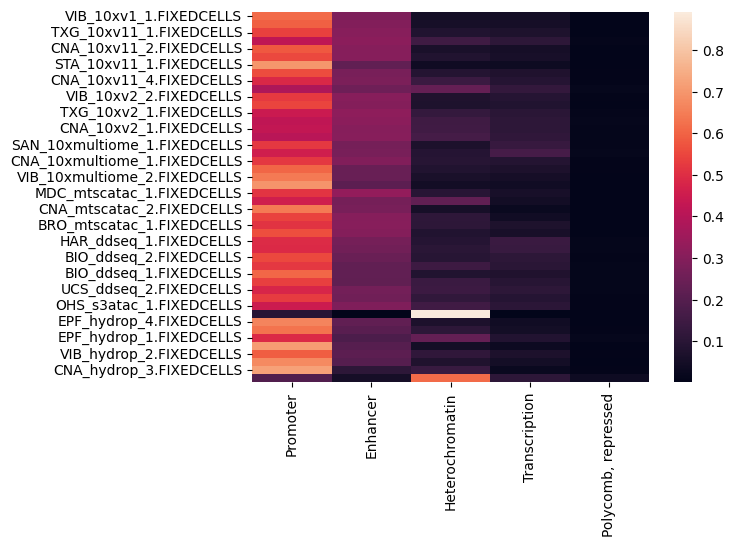

In [55]:
sns.heatmap(df_test)

In [56]:
df_test

,Promoter,Enhancer,Heterochromatin,Transcription,"Polycomb, repressed"
VIB_10xv1_1.FIXEDCELLS,0.614520,0.283735,0.049802,0.049402,0.002541
VIB_10xv1_2.FIXEDCELLS,0.592831,0.294400,0.055907,0.053538,0.003325
TXG_10xv11_1.FIXEDCELLS,0.536694,0.305468,0.080846,0.072055,0.004937
CNA_10xv11_3.FIXEDCELLS,0.420151,0.311948,0.150017,0.108425,0.009458
CNA_10xv11_2.FIXEDCELLS,0.579680,0.302189,0.063177,0.052315,0.002638
CNA_10xv11_1.FIXEDCELLS,0.553121,0.302875,0.080946,0.059496,0.003562
STA_10xv11_1.FIXEDCELLS,0.699129,0.227161,0.037047,0.034636,0.002028
STA_10xv11_2.FIXEDCELLS,0.557521,0.273100,0.086001,0.077623,0.005755
CNA_10xv11_4.FIXEDCELLS,0.485618,0.280041,0.137903,0.088334,0.008103
CNA_10xv11_5.FIXEDCELLS,0.381549,0.253374,0.232362,0.120123,0.012592


<AxesSubplot: >

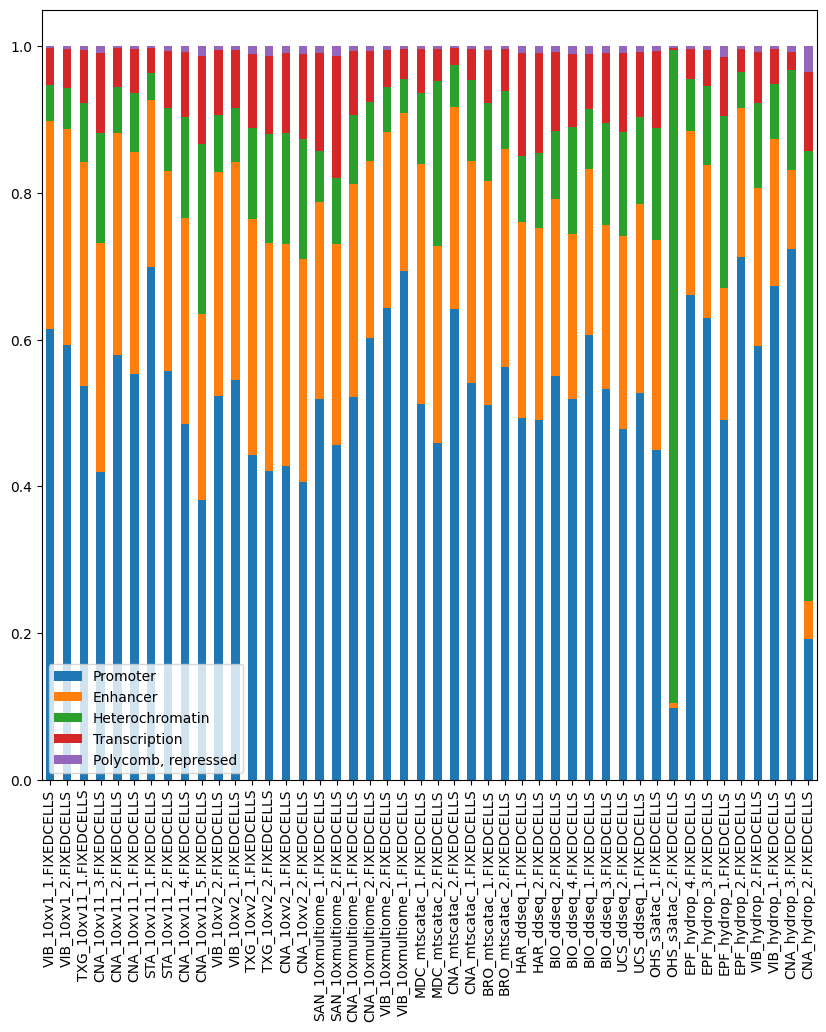

In [57]:
fig,ax = plt.subplots(figsize=(10,10))
df_test.plot.bar(stacked=True, ax=ax)

In [58]:
import matplotlib.pyplot as plt

In [59]:
df = pd.read_csv("chromhmm/final_df_toplot_overlaps_DARs.tsv", sep="\t", index_col=0)

In [63]:
order_dict_tech = {
    "10xmultiome": [
        "SAN_10xmultiome_1.FIXEDCELLS",
        "SAN_10xmultiome_2.FIXEDCELLS",
        "CNA_10xmultiome_1.FIXEDCELLS",
        "CNA_10xmultiome_2.FIXEDCELLS",
        "VIB_10xmultiome_2.FIXEDCELLS",
        "VIB_10xmultiome_1.FIXEDCELLS",
    ],
    "10xv1": ["VIB_10xv1_1.FIXEDCELLS", "VIB_10xv1_2.FIXEDCELLS"],
    "10xv11": [
        "TXG_10xv11_1.FIXEDCELLS",
        "CNA_10xv11_3.FIXEDCELLS",
        "CNA_10xv11_2.FIXEDCELLS",
        "CNA_10xv11_1.FIXEDCELLS",
        "STA_10xv11_1.FIXEDCELLS",
        "STA_10xv11_2.FIXEDCELLS",
    ],
    "10xv11c": ["CNA_10xv11_4.FIXEDCELLS", "CNA_10xv11_5.FIXEDCELLS"],
    "10xv2": [
        "VIB_10xv2_2.FIXEDCELLS",
        "VIB_10xv2_1.FIXEDCELLS",
        "TXG_10xv2_1.FIXEDCELLS",
        "TXG_10xv2_2.FIXEDCELLS",
        "CNA_10xv2_1.FIXEDCELLS",
        "CNA_10xv2_2.FIXEDCELLS",
    ],
    "ddseq": [
        "HAR_ddseq_1.FIXEDCELLS",
        "HAR_ddseq_2.FIXEDCELLS",
        "BIO_ddseq_2.FIXEDCELLS",
        "BIO_ddseq_4.FIXEDCELLS",
        "BIO_ddseq_1.FIXEDCELLS",
        "BIO_ddseq_3.FIXEDCELLS",
        "UCS_ddseq_2.FIXEDCELLS",
        "UCS_ddseq_1.FIXEDCELLS",
    ],
    "hydrop": [
        "EPF_hydrop_4.FIXEDCELLS",
        "EPF_hydrop_3.FIXEDCELLS",
        "EPF_hydrop_1.FIXEDCELLS",
        "EPF_hydrop_2.FIXEDCELLS",
        "VIB_hydrop_2.FIXEDCELLS",
        "VIB_hydrop_1.FIXEDCELLS",
        "CNA_hydrop_2.FIXEDCELLS",
    ],
    "mtscatacfacs": ["BRO_mtscatac_1.FIXEDCELLS", "BRO_mtscatac_2.FIXEDCELLS"],
    "mtscatac": [
        "MDC_mtscatac_1.FIXEDCELLS",
        "MDC_mtscatac_2.FIXEDCELLS",
        "CNA_mtscatac_2.FIXEDCELLS",
        "CNA_mtscatac_1.FIXEDCELLS",
    ],
    "s3atac": ["OHS_s3atac_1.FIXEDCELLS", "OHS_s3atac_2.FIXEDCELLS"],
}

tech_order = [
    "10xv1",
    "10xv11",
    "10xv11c",
    "10xv2",
    "10xmultiome",
    "mtscatac",
    "mtscatacfacs",
    "ddseq",
    "s3atac",
    "hydrop",
]

In [64]:
order = []
for key in tech_order:
    print(order_dict_tech[key])
    for i in order_dict_tech[key]:
        order.append(i)

['VIB_10xv1_1.FIXEDCELLS', 'VIB_10xv1_2.FIXEDCELLS']
['TXG_10xv11_1.FIXEDCELLS', 'CNA_10xv11_3.FIXEDCELLS', 'CNA_10xv11_2.FIXEDCELLS', 'CNA_10xv11_1.FIXEDCELLS', 'STA_10xv11_1.FIXEDCELLS', 'STA_10xv11_2.FIXEDCELLS']
['CNA_10xv11_4.FIXEDCELLS', 'CNA_10xv11_5.FIXEDCELLS']
['VIB_10xv2_2.FIXEDCELLS', 'VIB_10xv2_1.FIXEDCELLS', 'TXG_10xv2_1.FIXEDCELLS', 'TXG_10xv2_2.FIXEDCELLS', 'CNA_10xv2_1.FIXEDCELLS', 'CNA_10xv2_2.FIXEDCELLS']
['SAN_10xmultiome_1.FIXEDCELLS', 'SAN_10xmultiome_2.FIXEDCELLS', 'CNA_10xmultiome_1.FIXEDCELLS', 'CNA_10xmultiome_2.FIXEDCELLS', 'VIB_10xmultiome_2.FIXEDCELLS', 'VIB_10xmultiome_1.FIXEDCELLS']
['MDC_mtscatac_1.FIXEDCELLS', 'MDC_mtscatac_2.FIXEDCELLS', 'CNA_mtscatac_2.FIXEDCELLS', 'CNA_mtscatac_1.FIXEDCELLS']
['BRO_mtscatac_1.FIXEDCELLS', 'BRO_mtscatac_2.FIXEDCELLS']
['HAR_ddseq_1.FIXEDCELLS', 'HAR_ddseq_2.FIXEDCELLS', 'BIO_ddseq_2.FIXEDCELLS', 'BIO_ddseq_4.FIXEDCELLS', 'BIO_ddseq_1.FIXEDCELLS', 'BIO_ddseq_3.FIXEDCELLS', 'UCS_ddseq_2.FIXEDCELLS', 'UCS_ddseq_1.FIXEDCE

In [65]:
df

,Enhancer,Promoter,Transcription,Heterochromatin,"Polycomb, repressed",Ambiguous,Unassigned
BIO_ddseq_1.FIXEDCELLS,0.169372,0.112660,0.020432,0.007256,0.000191,0.689135,0.000955
BIO_ddseq_2.FIXEDCELLS,0.174406,0.084598,0.037548,0.033103,0.001379,0.668046,0.000920
BIO_ddseq_3.FIXEDCELLS,0.186952,0.102889,0.020503,0.008201,0.000746,0.679776,0.000932
BIO_ddseq_4.FIXEDCELLS,0.185892,0.116070,0.018355,0.005579,0.000540,0.672845,0.000720
BRO_mtscatac_1.FIXEDCELLS,0.214686,0.044007,0.025973,0.038312,0.001035,0.675209,0.000777
BRO_mtscatac_2.FIXEDCELLS,0.219696,0.041450,0.023714,0.038805,0.001078,0.674473,0.000784
CNA_10xmultiome_1.FIXEDCELLS,0.231065,0.045996,0.025608,0.019994,0.000197,0.676549,0.000591
CNA_10xmultiome_2.FIXEDCELLS,0.187116,0.070921,0.036845,0.035882,0.001445,0.667068,0.000722
CNA_10xv11_1.FIXEDCELLS,0.233192,0.037691,0.024618,0.022666,0.000849,0.680306,0.000679
CNA_10xv11_2.FIXEDCELLS,0.234201,0.041241,0.023376,0.024798,0.000800,0.674784,0.000800


In [66]:
df = df.loc[order]

In [67]:
df_test = df[["Promoter", "Enhancer", "Heterochromatin", "Transcription", "Polycomb, repressed"]].div(df[["Promoter", "Enhancer", "Heterochromatin", "Transcription", "Polycomb, repressed"]].sum(axis=1), axis=0)

<AxesSubplot: >

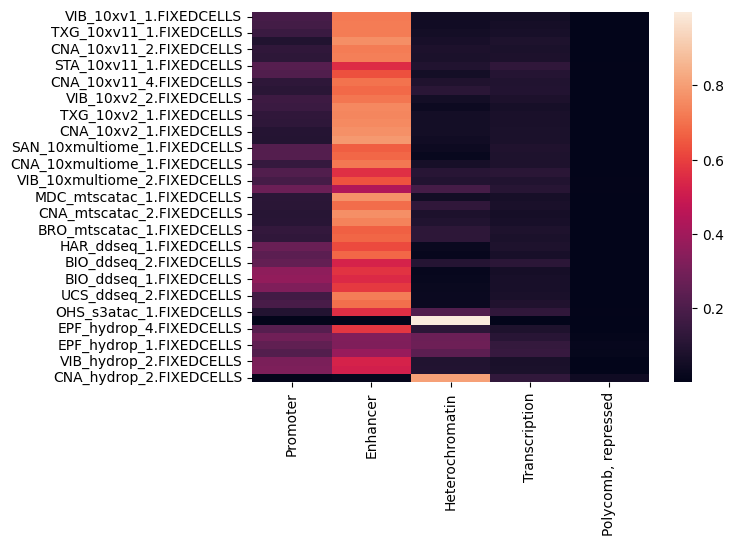

In [68]:
sns.heatmap(df_test)

<AxesSubplot: >

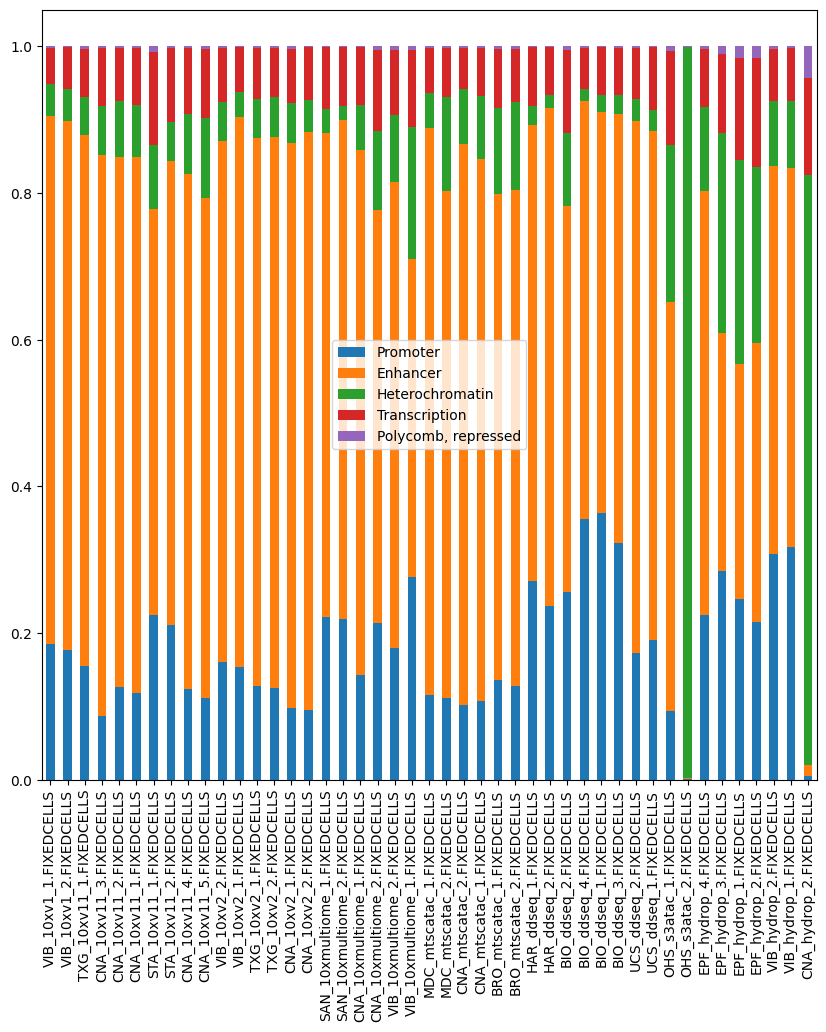

In [70]:
fig,ax = plt.subplots(figsize=(10,10))
df_test.plot.bar(stacked=True, ax=ax)